# ``Preparation``
###### HumidityRatio wurde gemessen an der Temperatur und der relativen Luftfeuchtigkeit

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
import datetime
df = pd.read_csv("Occupancy.csv")

In [3]:
deutscheNamen = ("Datum","Temperatur","Feuchtigkeit","Licht","CO2","Temperatur/RelativeFeuchtigkeit","Belegt Ja/Nein")
df.columns = deutscheNamen
print(np.unique(df["Belegt Ja/Nein"]))
# df.head()

# Nur Stunden und Minuten
# df["Datum"] = pd.to_datetime(df["Datum"]).dt.time

[0 1]


#### Korrelationsmatrix

In [4]:
# corrMatrix = df.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()
# print(f"ROWS: {len(df)}")

#### Daten für das Plotten vorbereiten

``Mache hier die Vorarbeit für die weiteren Schritte, setze bspw. auch das Zeitintervall``
- Ich kann die Daten so aggregieren, dass sie übereinander gelegt werden im Plot?
- Das heißt, dass ich alle Zeiten übereinander lappe, aller Tage

In [5]:
import seaborn as sns

# Analyse vom 02-02 bis 02-18 (16 Tage)

sns.set_theme(style="darkgrid")

# 8 Februar Sonntag
# 15 Februar
# Nur Zwei Sonntage enthalten
df2 = df.loc[(df['Datum'] >= '2015-02-08 07:00:00') & (df['Datum'] <= '2015-02-08 18:00:00')]

# Nur Stunden und Minuten
# df2["Datum"] = pd.to_datetime(df2["Datum"]).dt.time
# df2["Datum"] =  df2['Datum'].values.dt.total_seconds().div(60).astype(int)
dateInts = []
for i in df2["Datum"].values:
    # Konvertiert datetime.time zu einem String
    # print(type(i))
    dateInts.append(i)
    # dateInts.append(i.strftime("%Y-%m-%d %H:%M:%S"))

df2["ZeitTag"] = dateInts
df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])


df2 = df2.drop("Datum", 1)
# df2

C:\Users\Jörg\AppData\Local\Temp\ipykernel_1580\3403862666.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = dateInts
C:\Users\Jörg\AppData\Local\Temp\ipykernel_1580\3403862666.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])
C:\Users\Jörg\AppData\Local\Temp\ipykernel_1580\3403862666.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop

## Extrahieren der Testdaten
- Sonntage: 02-08 und 02-015
- Dienstage: 02-03 und 02-10

### Sonntage

In [6]:
daysSon = 8
for val in range(0,2):
    if len(str(daysSon)) <= 1:
        df_son = df.loc[(df['Datum'] > f'2015-02-0{str(daysSon)} 00:00:00') & (df['Datum'] <= f'2015-02-0{str(daysSon)} 23:59:00')]
    else: 
        df_temp=(df.loc[(df['Datum'] > f'2015-02-{str(daysSon)} 00:00:00') & (df['Datum'] <= f'2015-02-{str(daysSon)} 23:59:00')])
        df_son = pd.concat([df_son, df_temp])
    daysSon += 7
# df_son

In [7]:
# corrMatrix = df_son.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

### Ein Dienstag zum Vergleich

In [8]:
daysDi = 3
for val in range(0,1):
    if len(str(daysDi)) <= 1:
        df_di = df.loc[(df['Datum'] > f'2015-02-0{str(daysDi)} 00:00:00') & (df['Datum'] <= f'2015-02-0{str(daysDi)} 23:59:00')]
    else: 
        df_temp=(df.loc[(df['Datum'] > f'2015-02-{str(daysDi)} 00:00:00') & (df['Datum'] <= f'2015-02-{str(daysDi)} 23:59:00')])
        df_di = pd.concat([df_di, df_temp])
    daysDi += 10
# df_di

# Zusammenbringen der Testdaten

In [9]:
# df_son und df_di
df_test = pd.concat([df_son, df_di])
df_test = df_test.sort_index(ascending=True)
df_test

,Datum,Temperatur,Feuchtigkeit,Licht,CO2,Temperatur/RelativeFeuchtigkeit,Belegt Ja/Nein
582,2015-02-03 00:01:00,20.600000,22.200000,0.0,455.250000,0.003325,0
583,2015-02-03 00:02:00,20.600000,22.200000,0.0,455.250000,0.003325,0
584,2015-02-03 00:03:00,20.633333,22.230000,0.0,451.666667,0.003337,0
585,2015-02-03 00:04:00,20.600000,22.200000,0.0,451.000000,0.003325,0
586,2015-02-03 00:04:59,20.600000,22.200000,0.0,448.750000,0.003325,0
...,...,...,...,...,...,...,...
17115,2015-02-15 23:55:00,20.200000,29.600000,0.0,728.000000,0.004332,0
17116,2015-02-15 23:55:59,20.290000,29.600000,0.0,730.500000,0.004357,0
17117,2015-02-15 23:57:00,20.200000,29.500000,0.0,738.000000,0.004318,0
17118,2015-02-15 23:57:59,20.200000,29.463333,0.0,739.000000,0.004312,0


# Erzeugen der Trainingsdaten

In [10]:
# Deep Copy (Erzeugt neuen Speicherbereich mit .copy())
df_train = df.copy()
df_train.drop(df_test.index,axis=0,inplace=True)

In [11]:
print(f"Alle Daten: {len(df.values)}")
print(f"Testdaten: {len(df_test.values)}")
print(f"Trainingsdaten: {len(df_train.values)}")

Alle Daten: 20560
Testdaten: 4317
Trainingsdaten: 16243


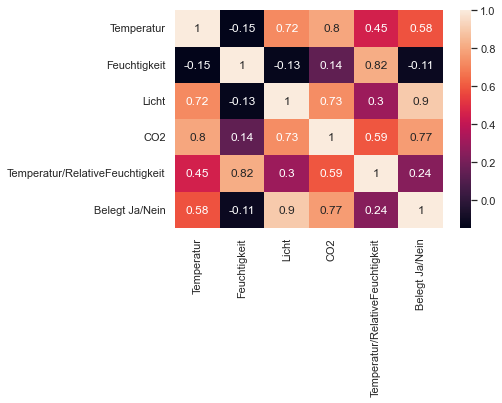

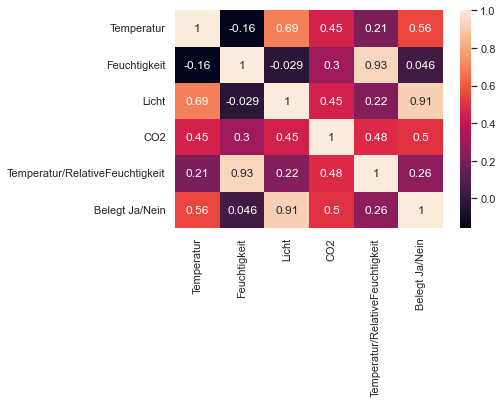

In [12]:
# corrMatrix = df_test.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

# corrMatrix = df.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()